In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

matplotlib.pyplot.figure(dpi=None)

In [134]:
%matplotlib inline

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
data.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [5]:
data.sample(frac=0.1)

gender race/ethnicity parental level of education         lunch  \
805    male        group A                some college  free/reduced   
758  female        group D                some college  free/reduced   
137    male        group E                 high school      standard   
522    male        group D           bachelor's degree      standard   
353  female        group C          associate's degree      standard   
..      ...            ...                         ...           ...   
861  female        group E             master's degree  free/reduced   
541    male        group D          associate's degree  free/reduced   
0    female        group B           bachelor's degree      standard   
450  female        group C                some college  free/reduced   
441  female        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
805                    none          75             81             74  
758               completed          52             59             65  
137                    none          70             55             56  
522                    none          69             58             57  
353                    none          46             58             57  
..                      ...         ...            ...            ...  
861                    none          81             86             87  
541               completed          79             82             80  
0                      none          72             72             74  
450               completed          64             85             85  
441                    none          78             81             80  

[100 rows x 8 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#It is a function that shows the analysis of numerical values.
data.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [8]:
#It is a function that shows the analysis of proximity values between data.
data.corr()

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

In [9]:
#control data
data.isnull().values.any()

False

In [10]:
#all data control for null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#show columns
for i,col in enumerate(data.columns):
    print(i+1,". column is ",col)

1 . column is  gender
2 . column is  race/ethnicity
3 . column is  parental level of education
4 . column is  lunch
5 . column is  test preparation course
6 . column is  math score
7 . column is  reading score
8 . column is  writing score


In [12]:
#rename columns
data.rename(columns=({'gender':'Gender',
                      'race/ethnicity':'Race/Ethnicity',
                      'parental level of education':'Parental_Level_of_Education',
                      'lunch':'Lunch',
                      'test preparation course':'Test_Preparation_Course',
                      'math score':'Math_Score',
                      'reading score':'Reading_Score',
                      'writing score':'Writing_Score'}),inplace=True)

In [13]:
#show columns
for i,col in enumerate(data.columns):
    print(i+1,". column is ",col)

1 . column is  Gender
2 . column is  Race/Ethnicity
3 . column is  Parental_Level_of_Education
4 . column is  Lunch
5 . column is  Test_Preparation_Course
6 . column is  Math_Score
7 . column is  Reading_Score
8 . column is  Writing_Score


In [14]:
#show count Gender
data['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

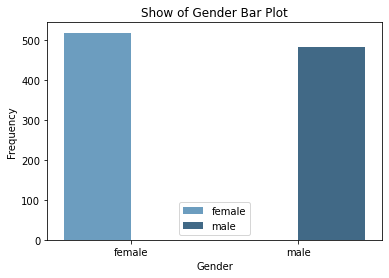

In [15]:
#Gender show bar plot

ax = sns.barplot(x=data['Gender'].value_counts().index,
                 y=data['Gender'].value_counts().values,
                 palette="Blues_d",
                 hue=['female','male'])

plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

No handles with labels found to put in legend.


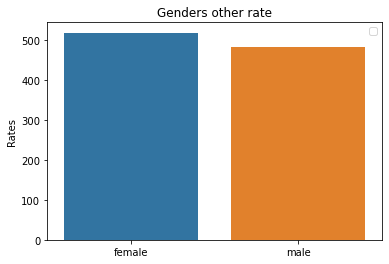

In [16]:

sns.barplot(x= data['Gender'].value_counts().index,
            y= data['Gender'].value_counts().values)

plt.title('Genders other rate')
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

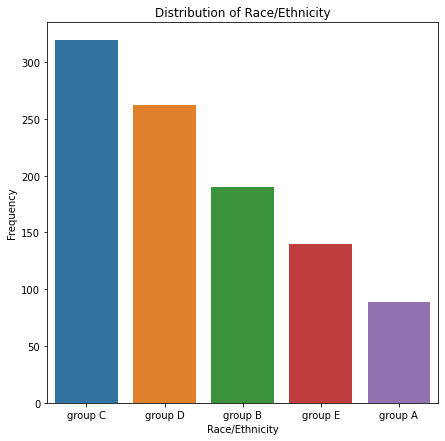

In [17]:
# Bar plot for the same variable, we should use index and values

plt.figure(figsize=(7,7))

sns.barplot(x = data['Race/Ethnicity'].value_counts().index,
            y = data['Race/Ethnicity'].value_counts().values)

plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Distribution of Race/Ethnicity')
plt.show()

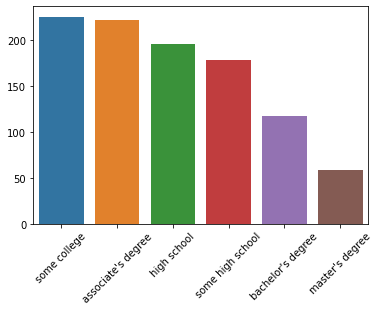

In [18]:
sns.barplot(x = data["Parental_Level_of_Education"].value_counts().index, 
            y = data["Parental_Level_of_Education"].value_counts().values,  
            data = data)
plt.xticks(rotation = 45)
plt.show()

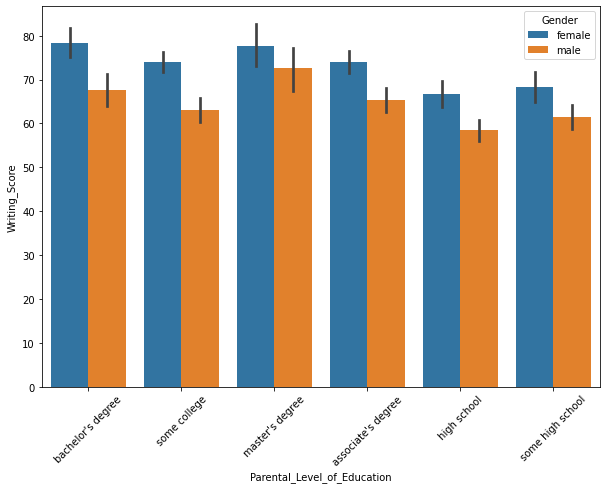

In [19]:
# bar plot when x and y are differrent

plt.figure(figsize=(10,7))

sns.barplot(x = "Parental_Level_of_Education", 
            y = "Writing_Score",
            hue = "Gender", 
            data = data)

plt.xticks(rotation=45)
plt.show()

<Figure size 720x504 with 0 Axes>

<Figure size 900x600 with 0 Axes>

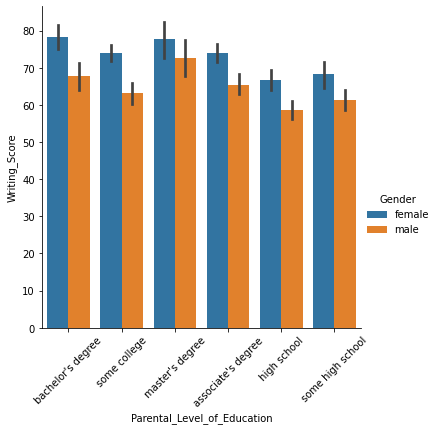

In [44]:
# bar plot when x and y are differrent

plt.figure(figsize=(10,7))
plt.figure(dpi = 150)

sns.catplot(data = data,
            x = "Parental_Level_of_Education", 
            y = "Writing_Score",
            kind = "bar",
            hue = "Gender")

plt.xticks(rotation = 45)
plt.show()

In [21]:
data['Race/Ethnicity'].value_counts().index

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object')

In [22]:
data['Race/Ethnicity'].value_counts().values

array([319, 262, 190, 140,  89], dtype=int64)

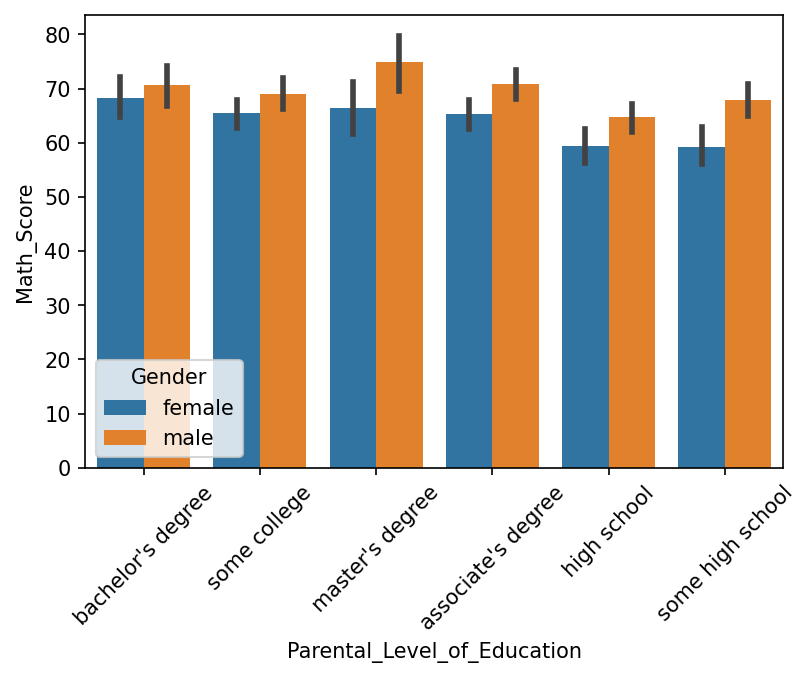

In [46]:
plt.figure(dpi = 150)
sns.barplot(x = "Parental_Level_of_Education", 
            y = "Math_Score", 
            hue = "Gender", 
            data = data)
plt.xticks(rotation = 45)
plt.show()

In [24]:
data["Parental_Level_of_Education"].value_counts().index

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [25]:
data["Parental_Level_of_Education"].value_counts().values

array([226, 222, 196, 179, 118,  59], dtype=int64)

<Figure size 1200x800 with 0 Axes>

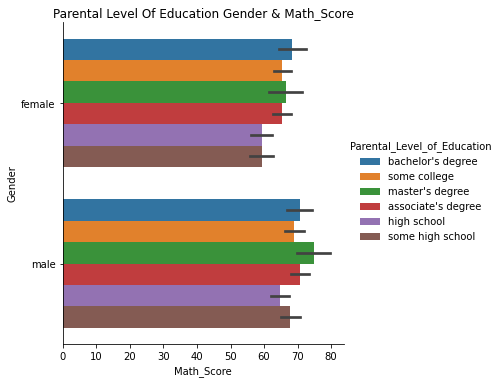

In [51]:
plt.figure(figsize=(12,7),
           dpi = 200)
sns.catplot(y = "Gender", 
            x = "Math_Score",
            hue = "Parental_Level_of_Education",
            data = data, 
            kind = "bar") 
plt.title('Parental Level Of Education Gender & Math_Score')
plt.show()

<Figure size 720x720 with 0 Axes>

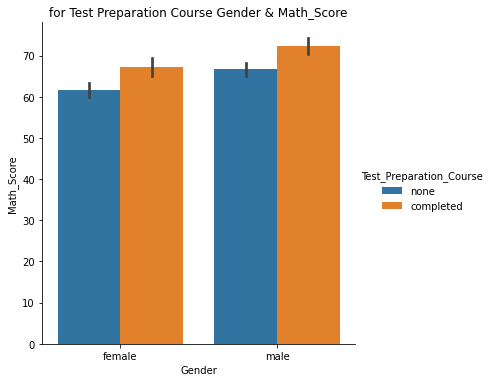

In [27]:
plt.figure(figsize=(10,10))

sns.catplot(x = "Gender", 
            y = "Math_Score",
            hue="Test_Preparation_Course",
            data=data, 
            kind="bar")
plt.title('for Test Preparation Course Gender & Math_Score')
plt.show()

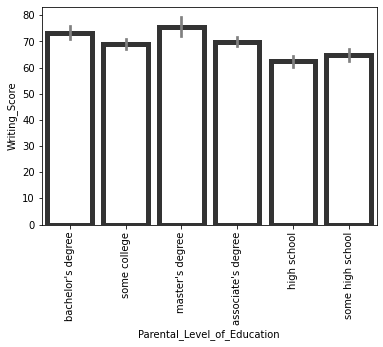

In [28]:
sns.barplot(x = "Parental_Level_of_Education", 
            y = "Writing_Score",
            data = data,
            linewidth = 5,
            facecolor = (1, 1, 1, 0),
            errcolor = ".5", 
            edgecolor = ".2")
plt.xticks(rotation = 90)
plt.show()

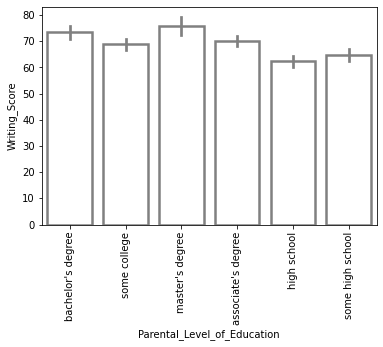

In [29]:
sns.barplot(x = "Parental_Level_of_Education", 
            y = "Writing_Score",
            data = data,
            linewidth = 2.5,
            facecolor = (1, 1, 1, 0),
            errcolor = ".5", 
            edgecolor = ".5")
plt.xticks(rotation=90)
plt.show()

## Drawing a nested barplot to show survival for class and sex

In [52]:
data.head()

Gender Race/Ethnicity Parental_Level_of_Education         Lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  Test_Preparation_Course  Math_Score  Reading_Score  Writing_Score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [53]:
data['Test_Preparation_Course'].unique()

array(['none', 'completed'], dtype=object)

In [54]:
data['Test_Preparation_Course'].head(10)

0         none
1    completed
2         none
3         none
4         none
5         none
6    completed
7         none
8    completed
9         none
Name: Test_Preparation_Course, dtype: object

In [55]:
data[data['Test_Preparation_Course']=="completed"].groupby(data['Lunch']).count()

Gender  Race/Ethnicity  Parental_Level_of_Education  Lunch  \
Lunch                                                                      
free/reduced     131             131                          131    131   
standard         227             227                          227    227   

              Test_Preparation_Course  Math_Score  Reading_Score  \
Lunch                                                              
free/reduced                      131         131            131   
standard                          227         227            227   

              Writing_Score  
Lunch                        
free/reduced            131  
standard                227

In [56]:
data[data['Test_Preparation_Course']=="completed"].groupby(data['Lunch']).sum()

Math_Score  Reading_Score  Writing_Score
Lunch                                                 
free/reduced        8259           9153           9216
standard           16692          17301          17426

In [57]:
data['Lunch'].groupby(data['Lunch']).count()

Lunch
free/reduced    355
standard        645
Name: Lunch, dtype: int64

In [58]:
data_lunch_score = data[data['Test_Preparation_Course']=="completed"].groupby(data['Lunch']).Writing_Score.sum()

In [59]:
data_lunch_score 

Lunch
free/reduced     9216
standard        17426
Name: Writing_Score, dtype: int64

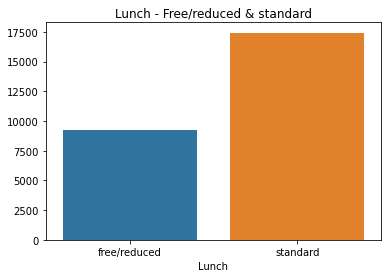

In [60]:
plt.title("Lunch - Free/reduced & standard")

sns.barplot(x = data_lunch_score.index,
            y = data_lunch_score.values)
plt.show()

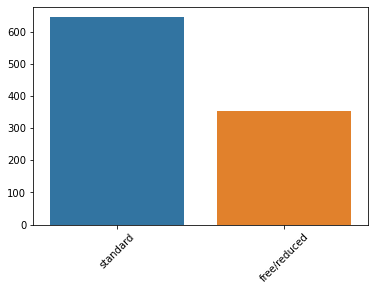

In [61]:
sns.barplot(x = data["Lunch"].value_counts().index, 
            y = data["Lunch"].value_counts().values, 
            data = data)
plt.xticks(rotation = 45)
plt.show()

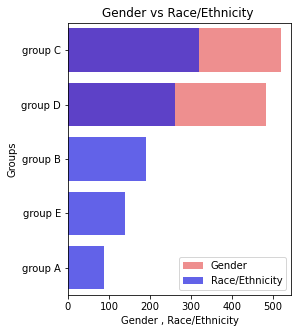

In [62]:
f,ax = plt.subplots(figsize=(4,5))

sns.barplot(x=data['Gender'].value_counts().values,
            y=data['Gender'].value_counts().index,
            alpha=0.5,
            color='red',
            label='Gender')

sns.barplot(x=data['Race/Ethnicity'].value_counts().values,
            y=data['Race/Ethnicity'].value_counts().index,
            color='blue',
            alpha=0.7,
            label='Race/Ethnicity')

ax.legend(loc='lower right',frameon=True)

ax.set(xlabel='Gender , Race/Ethnicity',
       ylabel='Groups',
       title="Gender vs Race/Ethnicity ")

plt.show()

<AxesSubplot:>

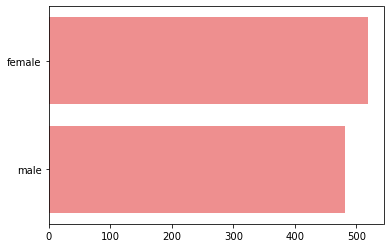

In [63]:
sns.barplot(x=data['Gender'].value_counts().values,
            y=data['Gender'].value_counts().index,
            alpha=0.5,
            color='red',
            label='Gender')


<AxesSubplot:>

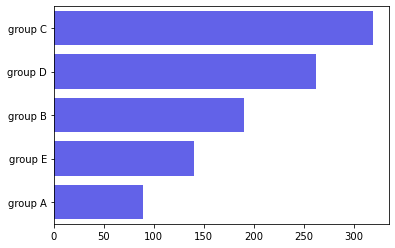

In [64]:
sns.barplot(x=data['Race/Ethnicity'].value_counts().values,
            y=data['Race/Ethnicity'].value_counts().index,
            color='blue',
            alpha=0.7,
            label='Race/Ethnicity')

# Point Plot

Syntax
seaborn.pointplot(x = None,

                  y = None,
                  
                  hue=None,
                  
                  data=None,
                  
                  order=None, 
                  
                  hue_order=None, 
                  
                  estimator=, 
                  
                  ci=95, 
                  
                  n_boot=1000,
                  
                  units=None, 
                  
                  markers='o',
                  
                  linestyles='-', 
                  
                  dodge=False,
                  
                  join=True, 
                  
                  scale=1, 
                  
                  orient=None, 
                  
                  color=None, 
                  
                  palette=None, 
                  
                  errwidth=None,
                  
                  capsize=None,
                  
                  ax=None, 
                  
                  **kwargs)

x, y, hue : names of variables in data or vector data, optional
    
data : DataFrame, array, or list of arrays, optional
    
order, hue_order : lists of strings, optional
    
markers : string or list of strings, optional
    
linestyles : string or list of strings, optional
    
color : matplotlib color, optional
    
palette : palette name, list, or dict, optional
    
ax : matplotlib Axes, optional

In [66]:
data['Race/Ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [67]:
len(data[(data['Race/Ethnicity']=='group B')].Math_Score)

190

In [68]:
len(data[(data['Race/Ethnicity']=='group A')].Math_Score)

89

In [69]:
len(data[(data['Race/Ethnicity']=='group C')].Math_Score)

319

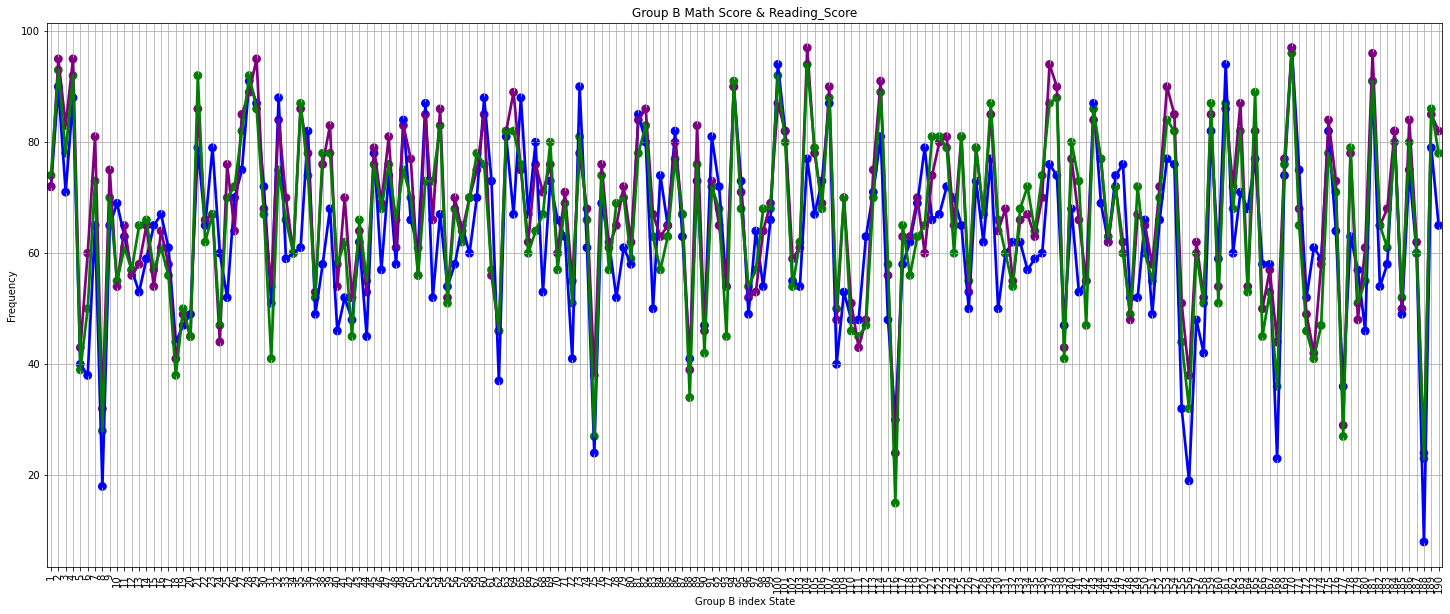

In [70]:

f,ax1=plt.subplots(figsize=(25,10))

sns.pointplot(x = np.arange(1,191),
              y= data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='blue',
              alpha=0.8)

sns.pointplot(x=np.arange(1,191),
              y=data[(data['Race/Ethnicity']=='group B')].Reading_Score,
              color = 'purple',
              alpha = 0.5)

sns.pointplot(x=np.arange(1,191),
              y=data[(data['Race/Ethnicity']=='group B')].Writing_Score,
              color = 'green',
              alpha = 0.5)


#sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.grid()
plt.show()

<AxesSubplot:ylabel='Math_Score'>

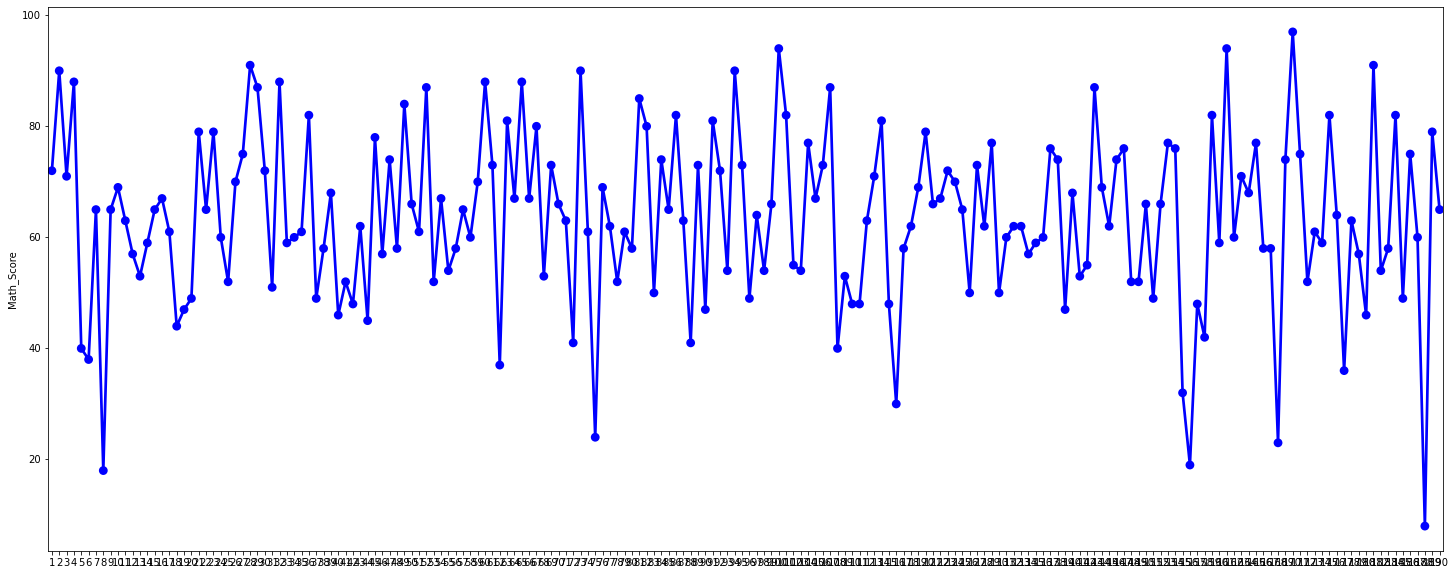

In [71]:
f,ax1=plt.subplots(figsize=(25,10))

sns.pointplot(x = np.arange(1,191),
              y= data[(data['Race/Ethnicity']=='group B')].Math_Score,
              color='blue',
              alpha=0.8)

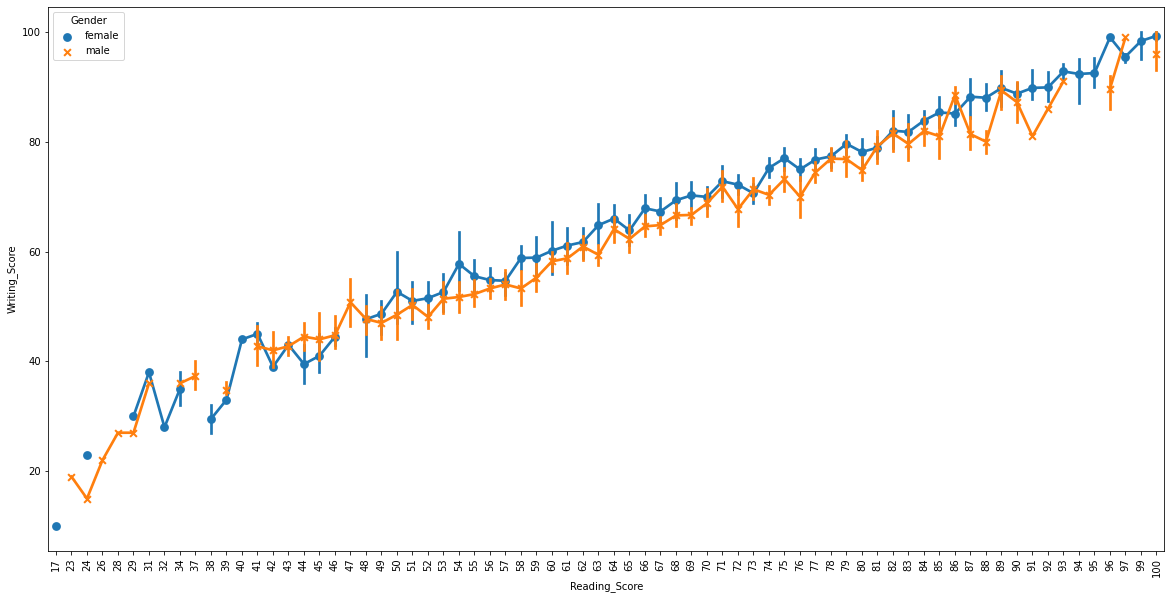

In [72]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x="Reading_Score", 
                   y="Writing_Score", 
                   hue="Gender",
                   data=data,
                   markers=["o", "x"],
                   linestyles=["-", "-"])
plt.xticks(rotation=90)
plt.show()

# Joint Plot

seaborn.jointplot(x, y, 
                  
                  data=None, 
                  
                  kind='scatter', 
                  
                  stat_func=None, 
                  
                  color=None, 
                  
                  height=6, 
                  
                  ratio=5, 
                  
                  space=0.2, 
                  
                  dropna=True, 
                  
                  xlim=None, 
                  
                  ylim=None, 
                  
                  joint_kws=None,
                  
                  marginal_kws=None, 
                  
                  annot_kws=None, 
                  
                  **kwargs)



x, y : strings or vectors
    
data : DataFrame, optional
    
kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
    
color : matplotlib color, optional
    
dropna : bool, optional

<Figure size 720x720 with 0 Axes>

<Figure size 900x600 with 0 Axes>

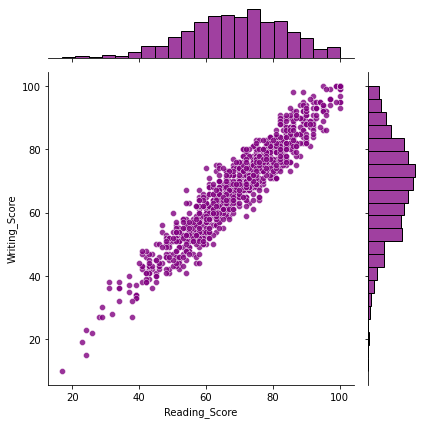

In [73]:
plt.figure(figsize = (10,10))
plt.figure(dpi = 150)
sns.jointplot(x= "Reading_Score", 
              y = "Writing_Score",
              data = data,
              color = 'purple',
              alpha = 0.8)
plt.xlabel('Reading Score')
plt.ylabel('Writing score')
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

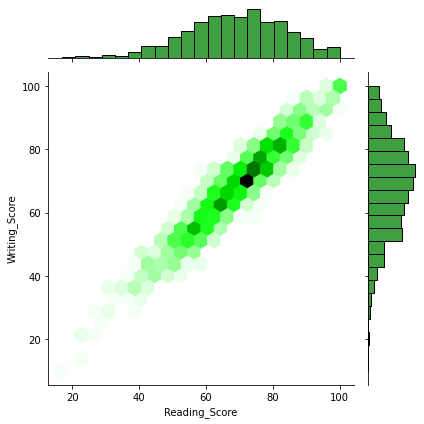

In [74]:
plt.figure(figsize = (10,10))

sns.jointplot(x= "Reading_Score", 
              y = "Writing_Score",
              data = data,
              kind = "hex",
              color = 'green',
              alpha = 1)
plt.xlabel('Reading Score')
plt.ylabel('Writing score')
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

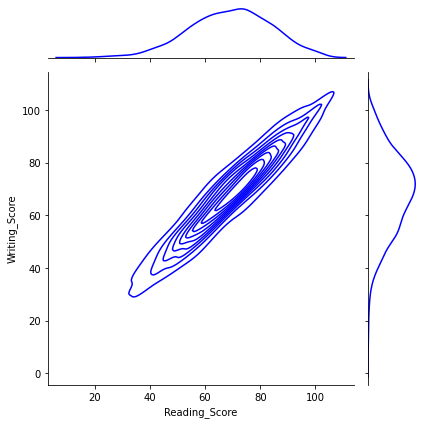

In [75]:
plt.figure(figsize = (10,10))

sns.jointplot(x= "Reading_Score", 
              y = "Writing_Score",
              data = data,
              space = 0,
              kind = "kde",
              color = 'blue')
plt.xlabel('Reading Score')
plt.ylabel('Writing score')
plt.tight_layout()
plt.show()

# Pie Chart

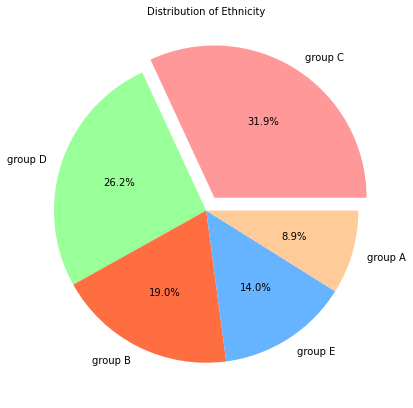

In [76]:
labels = data['Race/Ethnicity'].value_counts().index

colors = ['#ff9999','#99ff99','#ff6e40','#66b3ff','#ffcc99']

explode = [0.1,0,0,0,0]

values= data ['Race/Ethnicity'].value_counts().values

#visualization
plt.figure(figsize=(7,7))

plt.pie(values,
        explode = explode,
        labels = labels,
        colors = colors,
        autopct='%1.1f%%')

plt.title('Distribution of Ethnicity',
          color='black',
          fontsize=10)
plt.show()

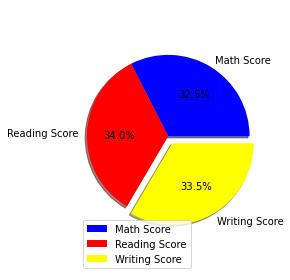

In [77]:
plt.figure(figsize=(4,4))

labels=['Math Score', 'Reading Score', 'Writing Score']

colors=['blue','red','yellow']

explode=[0,0,0.1]

values=[data.Math_Score.mean(),data.Reading_Score.mean(),data.Writing_Score.mean()]

plt.pie(values,
        labels=labels,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True)

plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

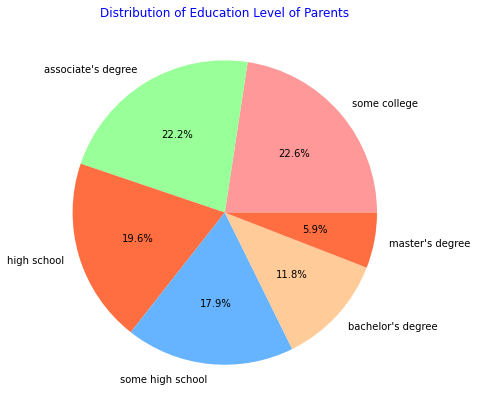

In [78]:
labels = data['Parental_Level_of_Education'].value_counts().index

colors = ['#ff9999','#99ff99','#ff6e40','#66b3ff','#ffcc99','#ff6e40']

explode = [0,0,0,0,0,0]

values= data ["Parental_Level_of_Education"].value_counts().values

#visualization
plt.figure(figsize=(7,7))

plt.pie(values,
        explode = explode,
        labels = labels,
        colors = colors,
        autopct='%1.1f%%')

plt.title('Distribution of Education Level of Parents',
          color='blue',
          fontsize=12)
plt.show()

# Lm Plot

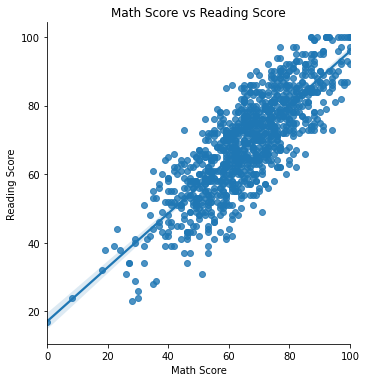

In [79]:
sns.lmplot(x = 'Math_Score',
           y = 'Reading_Score',
           data = data)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score')
plt.show()

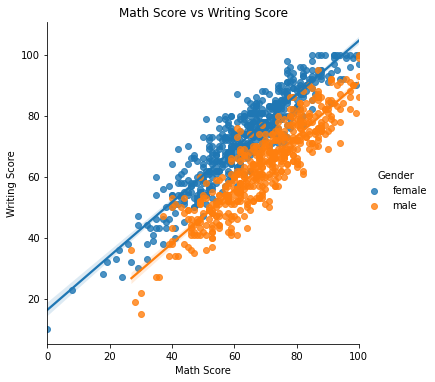

In [80]:
sns.lmplot(x = 'Math_Score',
           y = 'Writing_Score',
           hue = 'Gender',
           data=data)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

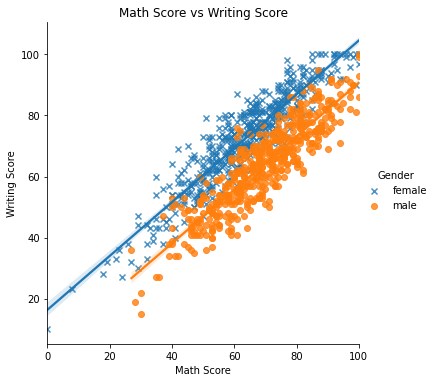

In [81]:
sns.lmplot(x = 'Math_Score',
           y = 'Writing_Score',
           hue = 'Gender',
           data = data,
           markers = ['x','o'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

# Kde Plot

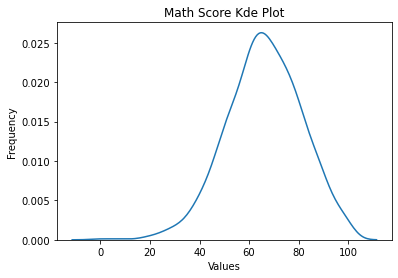

In [82]:
sns.kdeplot(data['Math_Score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Math Score Kde Plot')
plt.show()

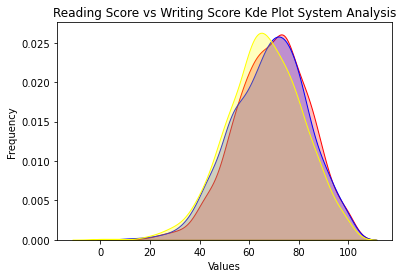

In [83]:
sns.kdeplot(data['Reading_Score'],
            shade = True, color = 'red')
sns.kdeplot(data['Writing_Score'],
            shade=True,color='blue')
sns.kdeplot(data['Math_Score'],
            shade = True, color = 'yellow')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Reading Score vs Writing Score Kde Plot System Analysis')
plt.show()


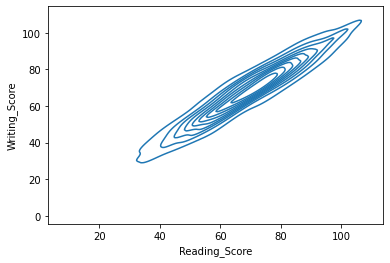

In [84]:
sns.kdeplot(data['Reading_Score'],
            data['Writing_Score'])
plt.show()

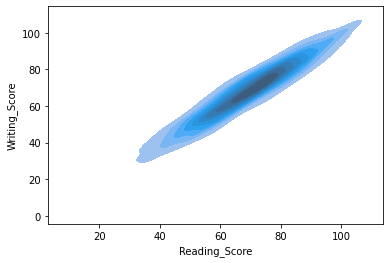

In [85]:
sns.kdeplot(data['Reading_Score'],
            data['Writing_Score'],
            shade = True)
plt.show()

# Violin Plot

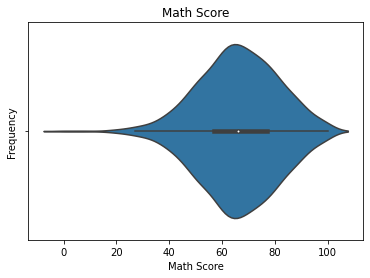

In [86]:
sns.violinplot(data['Math_Score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score')
plt.show()

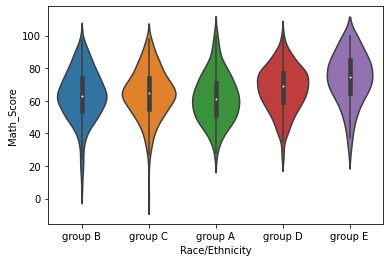

In [87]:
sns.violinplot(x = data['Race/Ethnicity'],
               y = data['Math_Score'])
plt.show()

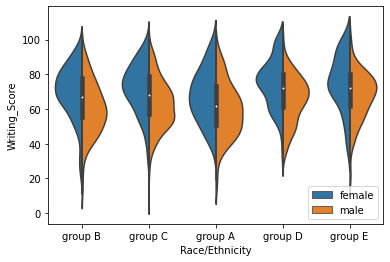

In [88]:
sns.violinplot(data['Race/Ethnicity'],
              data['Writing_Score'],
              hue = data['Gender'],
              split = True)
plt.legend(loc = 4)
plt.show()

# Heatmap Plot

In [89]:
data.corr()

Math_Score  Reading_Score  Writing_Score
Math_Score       1.000000       0.817580       0.802642
Reading_Score    0.817580       1.000000       0.954598
Writing_Score    0.802642       0.954598       1.000000

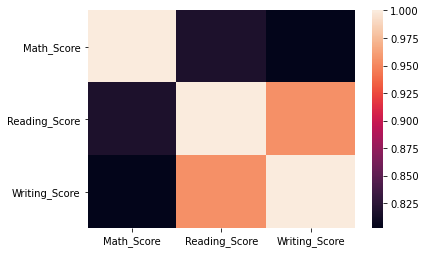

In [90]:
sns.heatmap(data.corr())
plt.show()

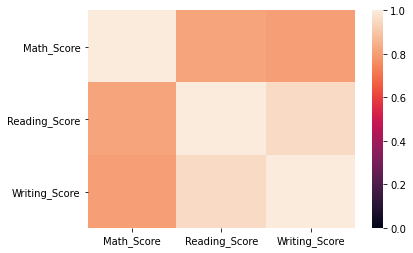

In [91]:
sns.heatmap(data.corr(),
            vmin = 0,
            vmax = 1)
plt.show()

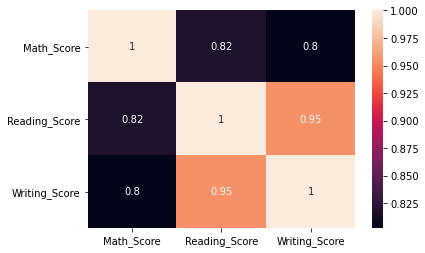

In [92]:
# Annotation
sns.heatmap(data.corr(),annot=True)
plt.show()

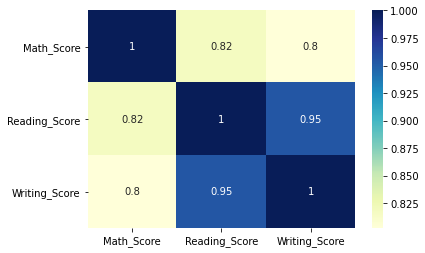

In [93]:
sns.heatmap(data.corr(),
            annot=True,
            cmap='YlGnBu')
plt.show()

# Box Plot

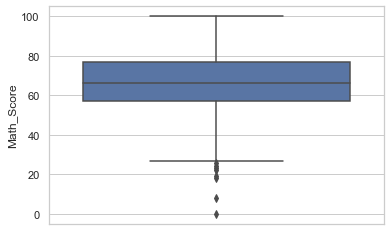

In [94]:
# univariate
sns.set(style = 'whitegrid')
sns.boxplot(y = data['Math_Score'])
plt.show()

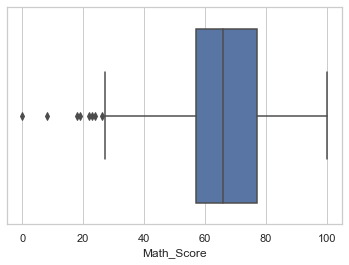

In [95]:
sns.set(style = 'whitegrid')
sns.boxplot(data['Math_Score'])
plt.show()

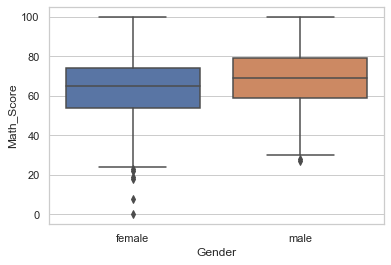

In [96]:
# Bivariate
sns.boxplot(x=data['Gender'],
            y=data['Math_Score'])
plt.show()

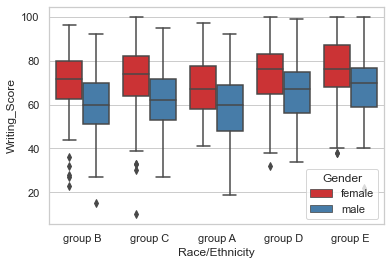

In [97]:
# three variables
sns.boxplot(x = data['Race/Ethnicity'],
            y = data['Writing_Score'], 
            hue = data['Gender'],
            palette="Set1")
plt.show()

# Swarm Plot

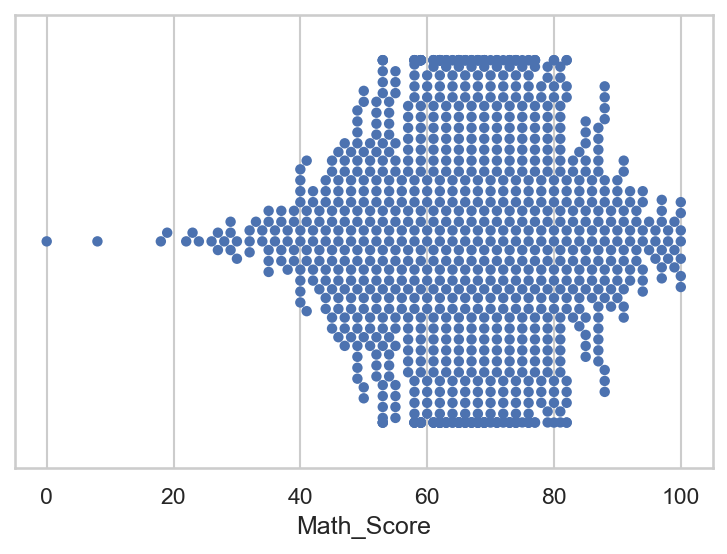

In [102]:
# One variable
sns.set(style='whitegrid')
plt.figure(dpi=150)
sns.swarmplot(x=data['Math_Score'])
plt.show()

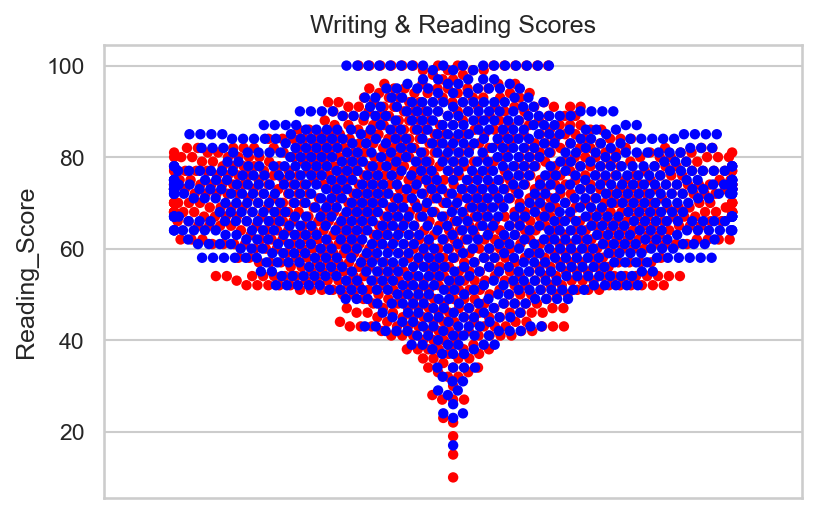

In [103]:
# Two variables (two plots)

sns.set(style="whitegrid")
plt.figure(dpi=150)
sns.swarmplot(y=data["Writing_Score"],
              color='red')
sns.swarmplot(y=data["Reading_Score"],
              color='blue')
plt.title('Writing & Reading Scores')
plt.show()



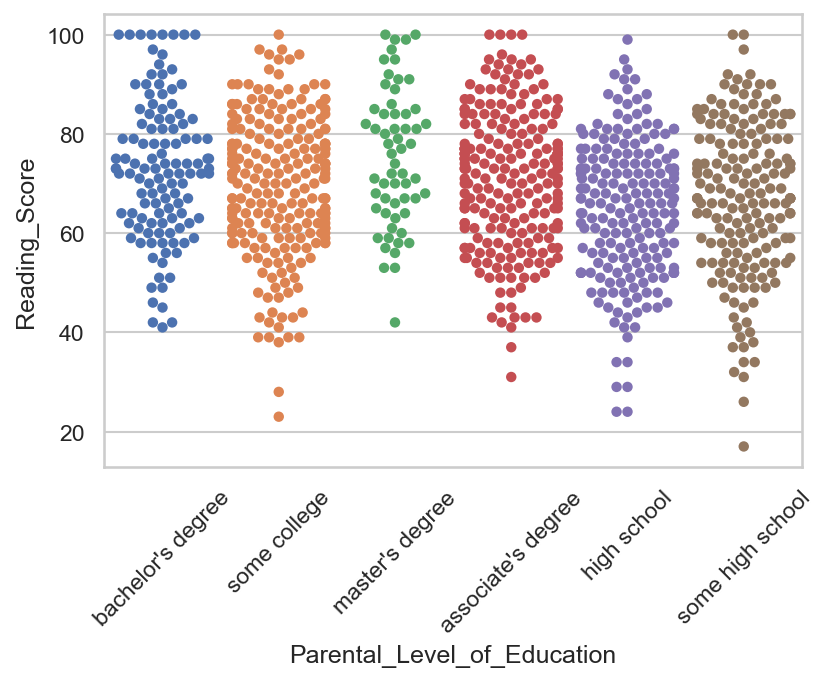

In [107]:
# Two variables, 2 categoricals
plt.figure(dpi=150)
sns.swarmplot(x=data['Parental_Level_of_Education'],
              y=data['Reading_Score'])
plt.xticks(rotation=45)
plt.show()

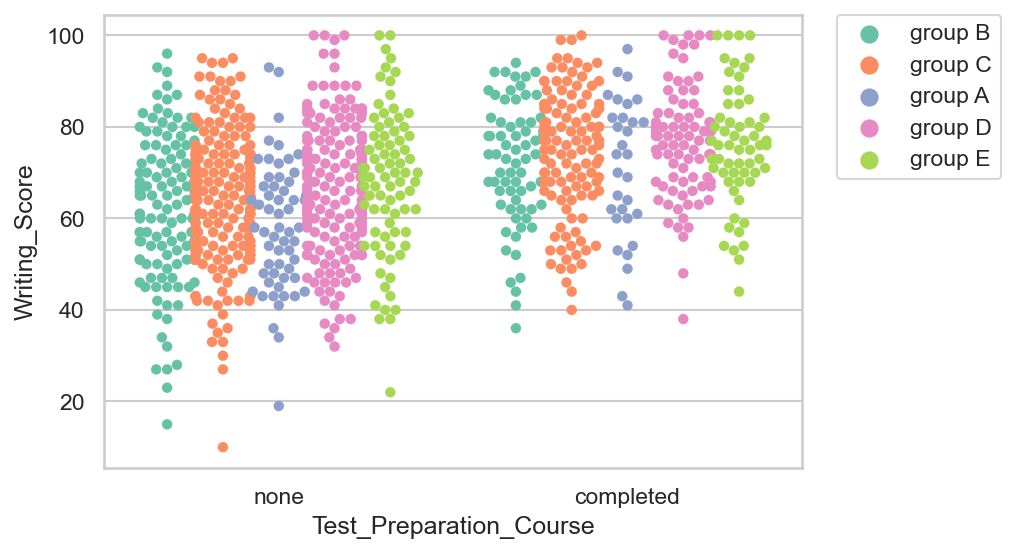

In [106]:
plt.figure(dpi=150)
sns.swarmplot(x=data['Test_Preparation_Course'],
              y=data['Writing_Score'],
              hue=data['Race/Ethnicity'],
              palette='Set2',
              dodge=True)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad = 0)
plt.show()

## Boxplot + swarmplot

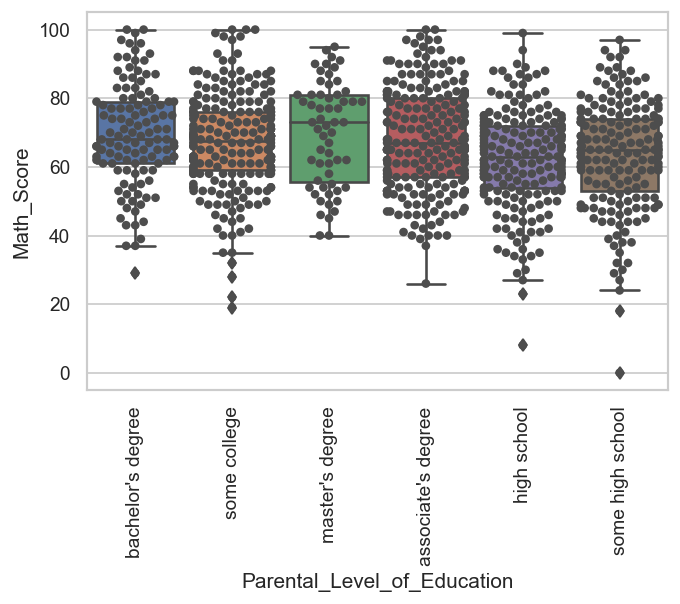

In [110]:
plt.figure(dpi=125)
sns.boxplot(x = data['Parental_Level_of_Education'],
            y = data['Math_Score'])
plt.xticks(rotation=90)
sns.swarmplot(x = data['Parental_Level_of_Education'],
              y=data['Math_Score'],
              color = ".30")
plt.xticks(rotation=90)
plt.show()

## swarmplot + violinplot

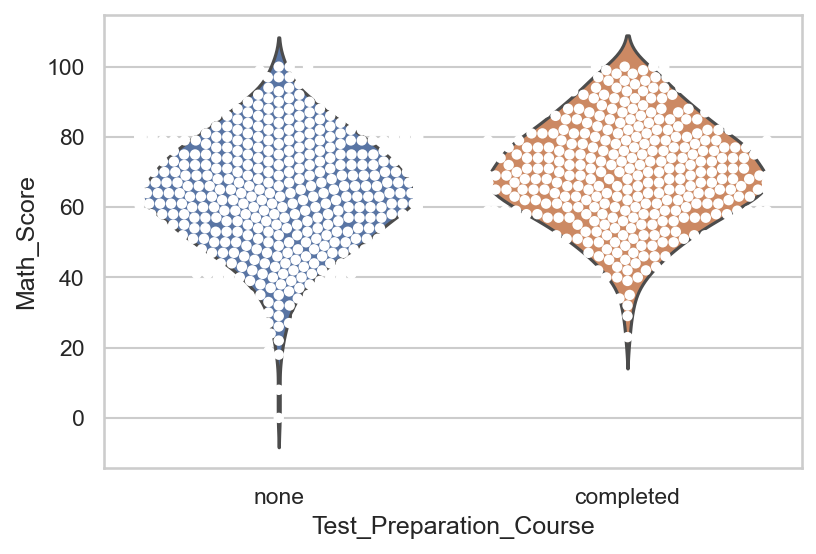

In [112]:
plt.figure(dpi=150)
sns.violinplot(x=data['Test_Preparation_Course'],
               y=data['Math_Score'],
               inner=None)
sns.swarmplot(x=data['Test_Preparation_Course'],
              y=data['Math_Score'],
              color='white',
              edgecolor='gray')
plt.show()

# Boxenplot

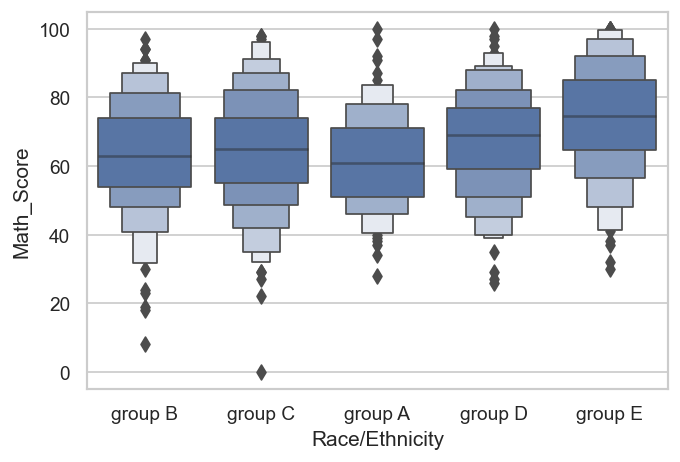

In [114]:
plt.figure(dpi=125)
sns.boxenplot(x="Race/Ethnicity", y="Math_Score",
              color="b",
              scale="linear", data=data)
plt.show()

# Pair Plot

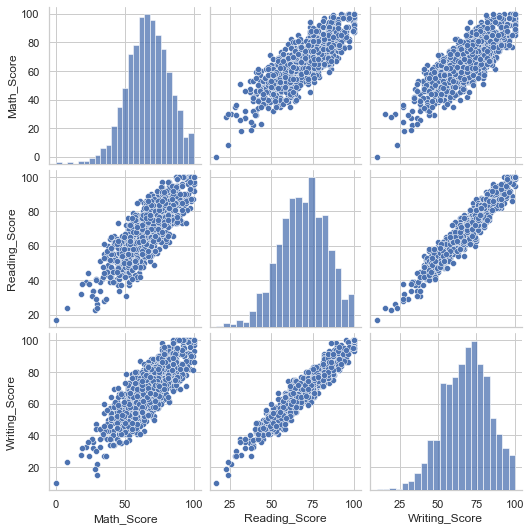

In [115]:
# Displaying only numerical data
sns.pairplot(data)
plt.show()

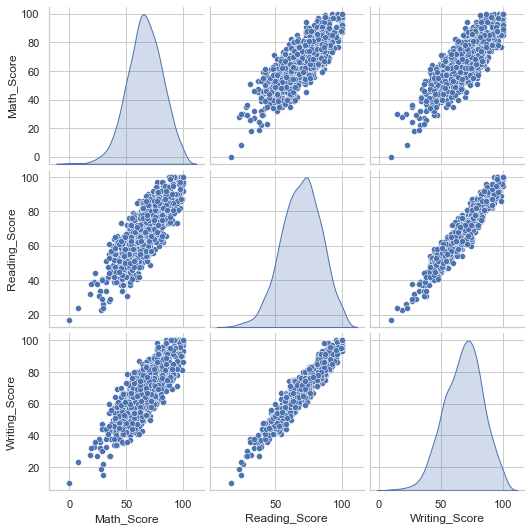

In [116]:
sns.pairplot(data,
             diag_kind = 'kde')
plt.show()

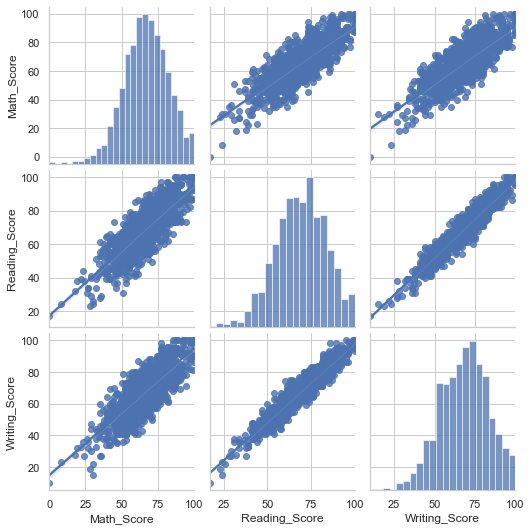

In [117]:
sns.pairplot(data,
             kind='reg')
plt.show()

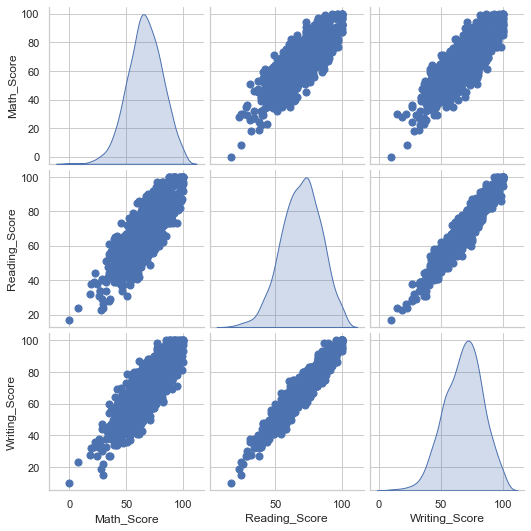

In [118]:
sns.pairplot(data, 
             diag_kind = "kde", 
             markers = "o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.show()

<Figure size 900x600 with 0 Axes>

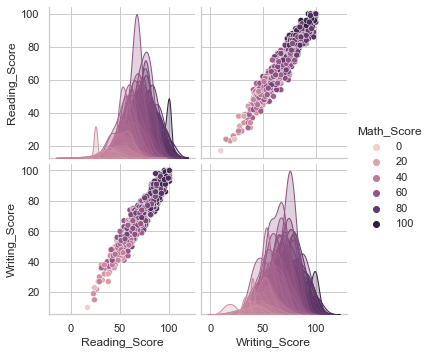

In [122]:
plt.figure(dpi=150)
sns.pairplot(data, hue="Math_Score")
plt.show()

# Count Plot

In [123]:
data.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')

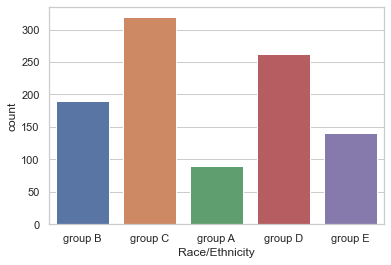

In [124]:
sns.countplot(data['Race/Ethnicity'])
plt.show()

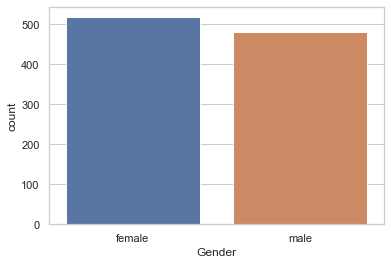

In [125]:
sns.countplot(data['Gender'])
plt.show()

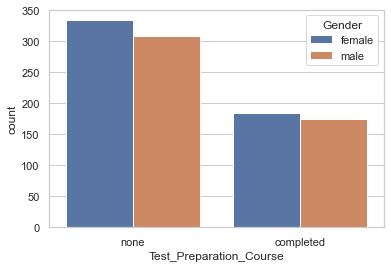

In [126]:
# Counting categorical variable
sns.countplot(data['Test_Preparation_Course'],
              hue = data["Gender"])
plt.show()

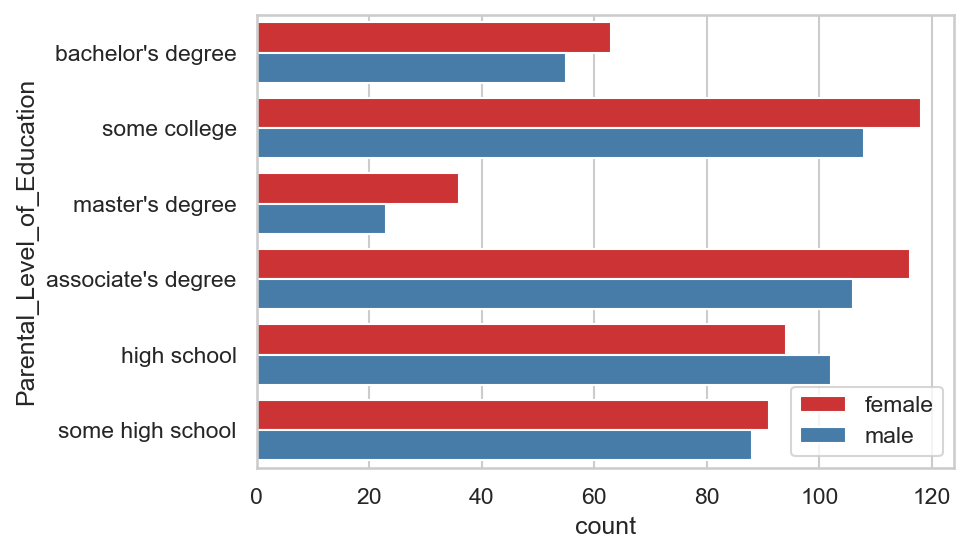

In [129]:
plt.figure(dpi=150)
sns.countplot(y = data['Parental_Level_of_Education'],
              palette = "Set1",
              hue = data['Gender'])
plt.legend(loc=4)
plt.show()

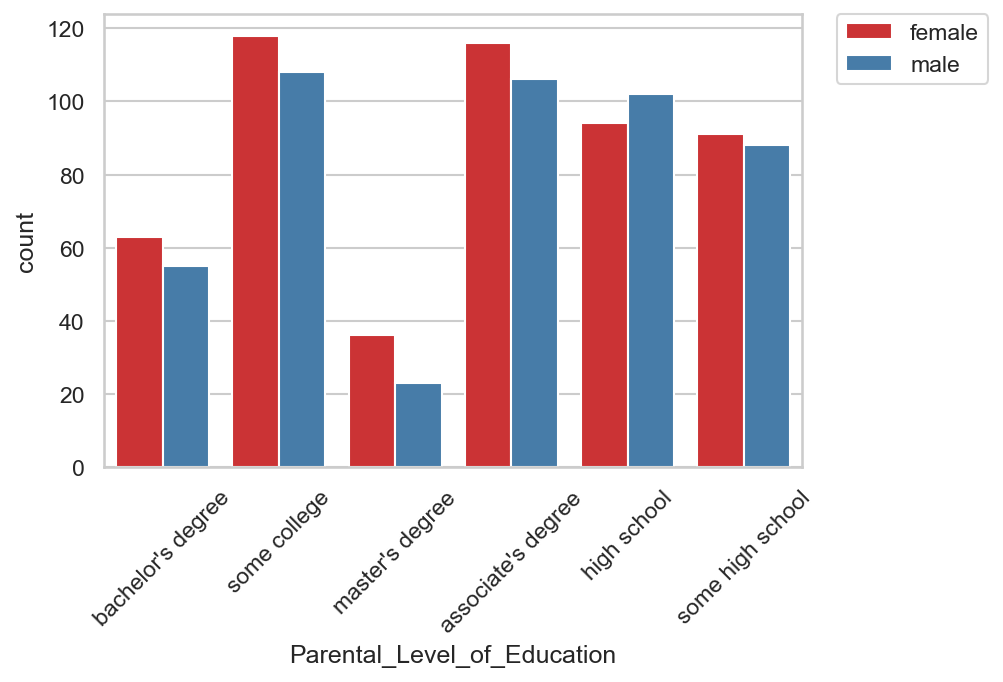

In [131]:
plt.figure(dpi=150)
sns.countplot(x = 'Parental_Level_of_Education',
              data =data,
              palette = "Set1",
              hue = 'Gender')
plt.legend(loc=4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Strip Plot

## One variable

<AxesSubplot:xlabel='Math_Score'>

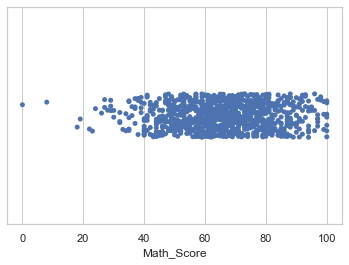

In [136]:
sns.stripplot(x=data['Math_Score'])

## Two variables (one numeric and one categorical)

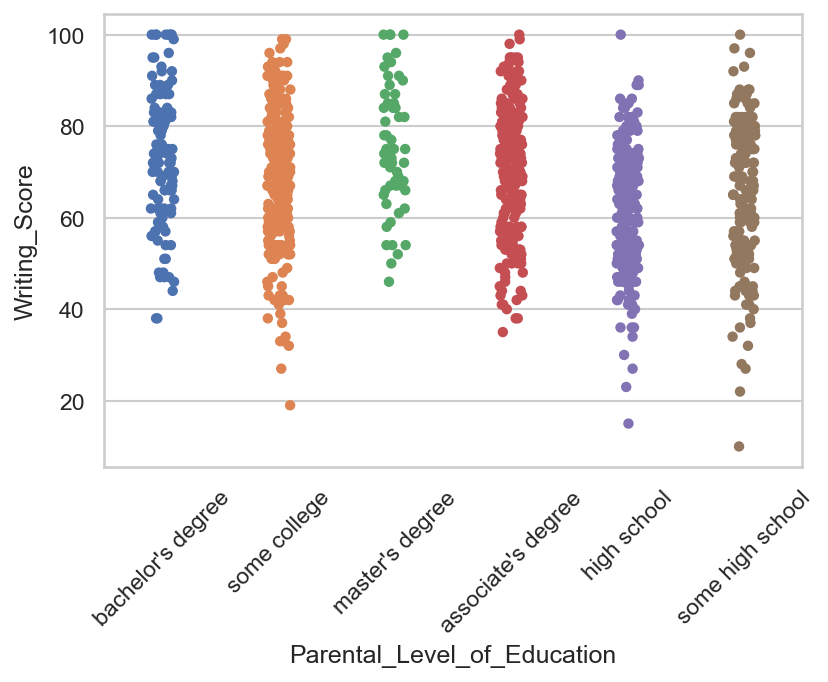

In [141]:
plt.figure(dpi =150)
sns.stripplot(x="Parental_Level_of_Education",
              y='Writing_Score',
              data=data)
plt.xticks(rotation=45)
plt.show()

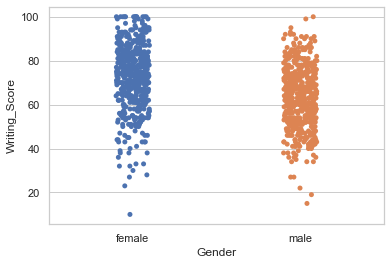

In [146]:
sns.stripplot(data = data,
              x = "Gender",
              y = 'Writing_Score')
plt.show()

## Three variables (One numeric and two categorical)

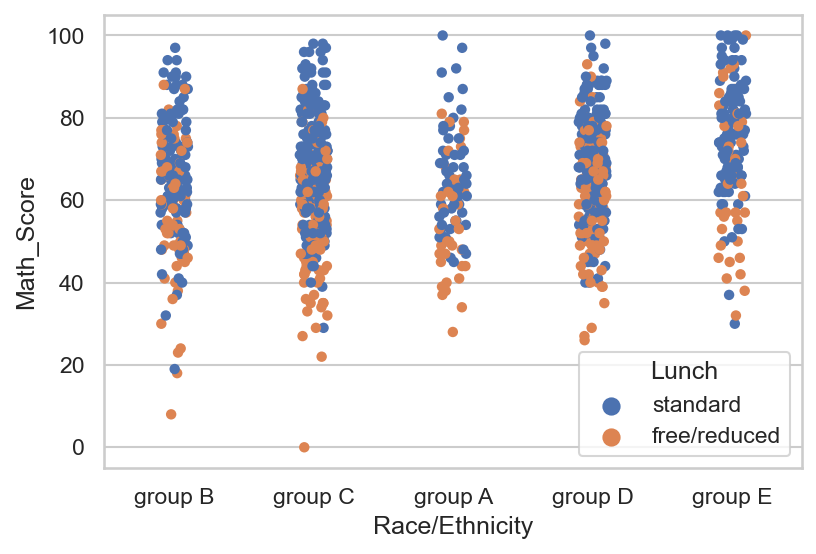

In [148]:
plt.figure(dpi =150)
sns.stripplot(data=data,
              x='Race/Ethnicity',
              y='Math_Score',
              hue='Lunch')
plt.show()

To seperate two levels of one categorical variable, we will use dodge = True

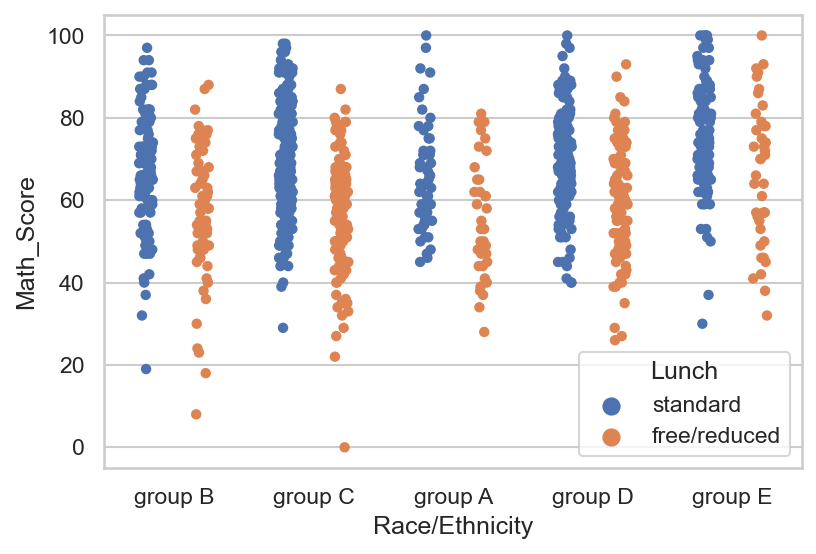

In [150]:
plt.figure(dpi =150)
sns.stripplot(data=data,
              x='Race/Ethnicity',
              y='Math_Score',
              hue='Lunch',
              dodge=True)
plt.show()

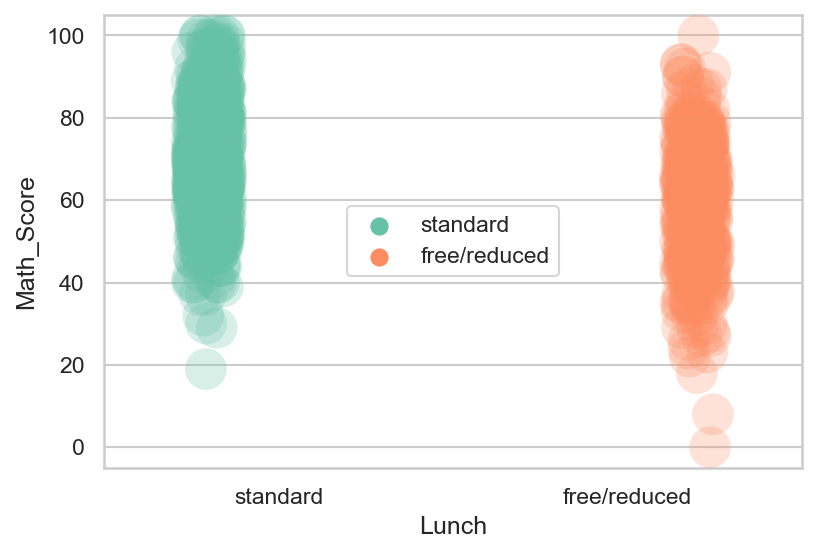

In [160]:
plt.figure(dpi =150)
sns.stripplot(data=data,
              x='Lunch',
              y='Math_Score',
              hue='Lunch',
              dodge=True,
              size=20,
              alpha=.25,
              palette="Set2")
plt.legend(loc=10)
plt.show()

# Factor Plot

In [162]:
data.head()

Gender Race/Ethnicity Parental_Level_of_Education         Lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  Test_Preparation_Course  Math_Score  Reading_Score  Writing_Score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

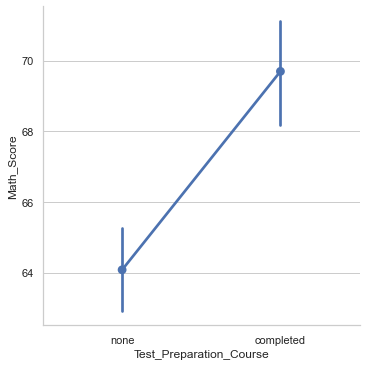

In [164]:
sns.factorplot(data=data,
               x = "Test_Preparation_Course", 
               y = "Math_Score" )
plt.show()

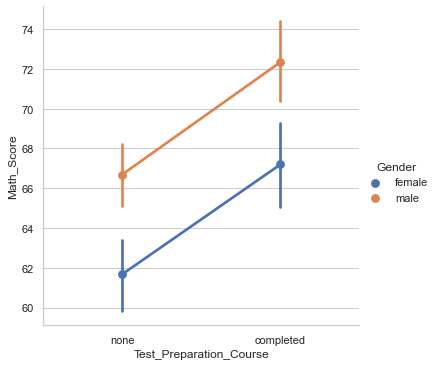

In [166]:
sns.factorplot(data = data,
               x = "Test_Preparation_Course", 
               y = "Math_Score",
              hue = "Gender")
plt.show()

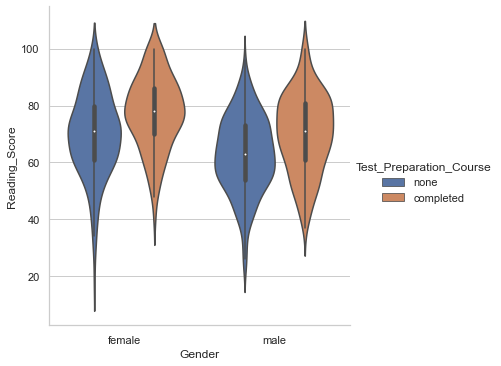

In [167]:
sns.factorplot(data=data,
               x = "Gender", 
               y = "Reading_Score",
               hue = "Test_Preparation_Course", 
               kind='violin')
plt.show()

# DisPlot

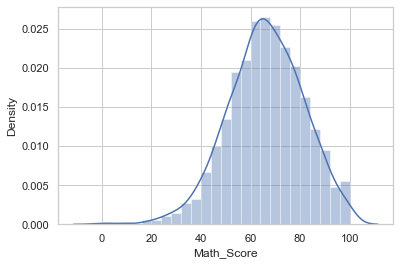

In [172]:
sns.distplot(data['Math_Score'])
plt.show()

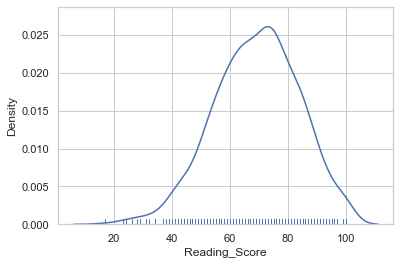

In [170]:
sns.distplot(data['Reading_Score'], 
             rug=True, 
             hist=False)
plt.show()

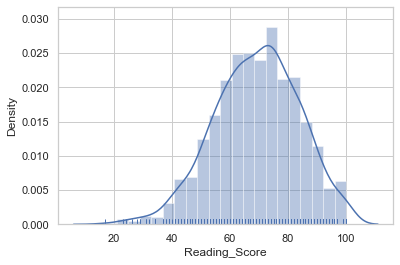

In [171]:
sns.distplot(data['Reading_Score'], 
             rug = True, 
             hist= True)
plt.show()

## Changing color

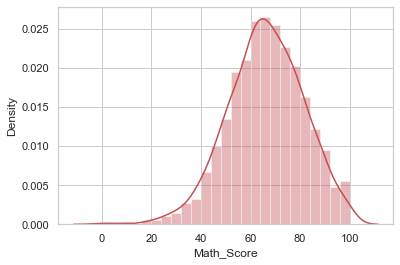

In [176]:
sns.distplot(data['Math_Score'], 
             color = "r")
plt.show()

# Despine

The despine() is a function that removes the spines from the right and upper portion of the plot by default. 

sns.despine(left = True) helps remove the spine from the left.

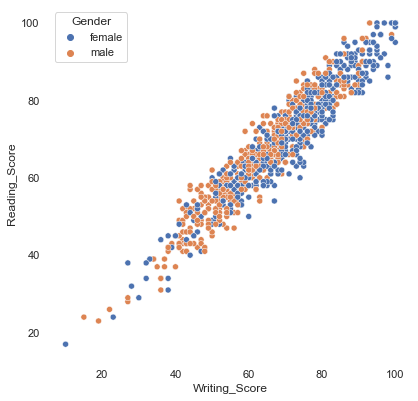

In [184]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, 
            bottom=True)
sns.scatterplot(data=data,
                x="Writing_Score", 
                y="Reading_Score",
                hue="Gender")
plt.show()

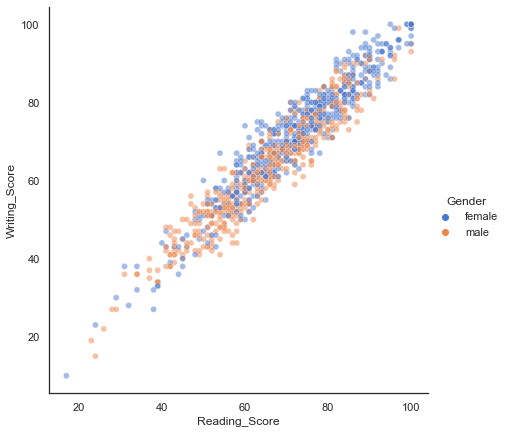

In [185]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(data=data,
            x="Reading_Score",
            y="Writing_Score",
            hue="Gender",
            alpha=.5, 
            palette="muted",
            height = 6)
plt.show()